In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import helper

In [2]:
translator, data, targets = helper.get_data("../mel-grams")

In [3]:
data = helper.image_processor(data)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, targets, test_size=0.2, shuffle=True, random_state=0)

In [5]:
# Set the parameters by cross-validation
# Try just tuning the n_neighbours first
tuned_parameters = [{'n_neighbors':[i+1 for i in range(50)], 
                     }]

scores = ['accuracy']

for score in scores:
    
    optimized_knn_model = GridSearchCV(
        KNeighborsClassifier(), tuned_parameters, scoring=score
    )
    optimized_knn_model.fit(X_train, y_train)
    
    print("Best parameters set found on development set:")
    print()
    print(optimized_knn_model.best_params_)
    means = optimized_knn_model.cv_results_['mean_test_score']
    stds = optimized_knn_model.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, optimized_knn_model.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

    y_true, y_pred = y_test, optimized_knn_model.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()
    print(accuracy_score(y_true, y_pred))

Best parameters set found on development set:

{'n_neighbors': 27}
0.367 (+/-0.059) for {'n_neighbors': 1}
0.355 (+/-0.039) for {'n_neighbors': 2}
0.362 (+/-0.054) for {'n_neighbors': 3}
0.379 (+/-0.023) for {'n_neighbors': 4}
0.369 (+/-0.053) for {'n_neighbors': 5}
0.372 (+/-0.019) for {'n_neighbors': 6}
0.363 (+/-0.032) for {'n_neighbors': 7}
0.368 (+/-0.054) for {'n_neighbors': 8}
0.370 (+/-0.037) for {'n_neighbors': 9}
0.380 (+/-0.014) for {'n_neighbors': 10}
0.377 (+/-0.024) for {'n_neighbors': 11}
0.377 (+/-0.036) for {'n_neighbors': 12}
0.374 (+/-0.027) for {'n_neighbors': 13}
0.379 (+/-0.034) for {'n_neighbors': 14}
0.370 (+/-0.058) for {'n_neighbors': 15}
0.377 (+/-0.054) for {'n_neighbors': 16}
0.384 (+/-0.039) for {'n_neighbors': 17}
0.379 (+/-0.039) for {'n_neighbors': 18}
0.377 (+/-0.034) for {'n_neighbors': 19}
0.382 (+/-0.035) for {'n_neighbors': 20}
0.385 (+/-0.048) for {'n_neighbors': 21}
0.374 (+/-0.037) for {'n_neighbors': 22}
0.385 (+/-0.049) for {'n_neighbors': 23}

/Users/jzl/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


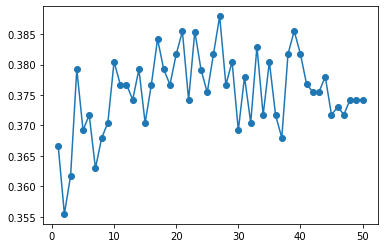

In [6]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

x_interval = np.arange(1, len(optimized_knn_model.cv_results_['mean_test_score'])+ 1)
ax.scatter(x_interval, optimized_knn_model.cv_results_['mean_test_score'])
ax.plot(x_interval, optimized_knn_model.cv_results_['mean_test_score'])

plt.savefig("n_neighbours_hyperparam.png")

## Parameters To Explore
* n_neighbours - how many "nearby" points should be consulted?
* algorithm - auto, ball_tree, kd_tree, brute
  * ball_tree
  * kd_tree 
  * auto - select from one of the two
* leaf_size - might not be too relevant, just performance
  * care more about accuracy this particular round
* metric - how the distance between points is determined
* metric_params - additional keywords for metric function
* n_jobs: number of parallel jobs to run for neighbours search
  * always set to n=-1

https://towardsdatascience.com/a-simple-introduction-to-k-nearest-neighbors-algorithm-b3519ed98e
    
* In general, choose k = sqrt(N) where N is number of samples in training dataset
  * with 80:20 split, sqrt(799) = 28.266... = 27
* Try and keep the value of k odd in order to avoid confusion between two classes of data


In [7]:
# Get data out
# def custom_weights(x):
#    print(type(x))
#    print(np.shape(x))
# dimensions come out to (160/159, 27)

# ignore
# def custom_weights(x):
#    full_arr = []
#    row = []
#    for row in x:
#        for val in row:
#            if val == 0:
#                row.append(0)
#            else:
#                row.append(1/(val**2))
#        full_arr.append(row)
#        row = []
#    return full_arr

# Weighted versus Uniform voting

In [8]:
tuned_parameters = [{'n_neighbors': [27], 
                     'weights':['uniform', 'distance']}]

scores = ['accuracy']

for score in scores:
    
    optimized_knn_model = GridSearchCV(
        KNeighborsClassifier(), tuned_parameters, scoring=score
    )
    optimized_knn_model.fit(X_train, y_train)
    
    print("Best parameters set found on development set:")
    print()
    print(optimized_knn_model.best_params_)
    means = optimized_knn_model.cv_results_['mean_test_score']
    stds = optimized_knn_model.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, optimized_knn_model.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

    y_true, y_pred = y_test, optimized_knn_model.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()
    print(accuracy_score(y_true, y_pred))

Best parameters set found on development set:

{'n_neighbors': 27, 'weights': 'distance'}
0.388 (+/-0.066) for {'n_neighbors': 27, 'weights': 'uniform'}
0.400 (+/-0.062) for {'n_neighbors': 27, 'weights': 'distance'}
              precision    recall  f1-score   support

           0       0.20      0.07      0.11        14
           1       0.57      0.73      0.64        11
           2       0.00      0.00      0.00        26
           3       0.57      0.33      0.42        24
           4       0.37      0.48      0.42        27
           5       0.16      0.50      0.24        16
           6       0.31      0.83      0.45        18
           7       0.76      0.57      0.65        23
           8       0.00      0.00      0.00        21
           9       0.17      0.05      0.08        20

    accuracy                           0.34       200
   macro avg       0.31      0.36      0.30       200
weighted avg       0.31      0.34      0.29       200


0.335


/Users/jzl/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Distance Metric

In [9]:
tuned_parameters = [{'n_neighbors': [27], 
                     'weights':['distance'],
                     'metric': ['euclidean', 'manhattan', 'chebyshev', 'hamming', 'canberra', 'braycurtis']}]

scores = ['accuracy']

for score in scores:
    
    optimized_knn_model = GridSearchCV(
        KNeighborsClassifier(), tuned_parameters, scoring=score
    )
    optimized_knn_model.fit(X_train, y_train)
    
    print("Best parameters set found on development set:")
    print()
    print(optimized_knn_model.best_params_)
    means = optimized_knn_model.cv_results_['mean_test_score']
    stds = optimized_knn_model.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, optimized_knn_model.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

    y_true, y_pred = y_test, optimized_knn_model.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()
    print(accuracy_score(y_true, y_pred))

Best parameters set found on development set:

{'metric': 'manhattan', 'n_neighbors': 27, 'weights': 'distance'}
0.400 (+/-0.062) for {'metric': 'euclidean', 'n_neighbors': 27, 'weights': 'distance'}
0.405 (+/-0.034) for {'metric': 'manhattan', 'n_neighbors': 27, 'weights': 'distance'}
0.204 (+/-0.058) for {'metric': 'chebyshev', 'n_neighbors': 27, 'weights': 'distance'}
0.337 (+/-0.082) for {'metric': 'hamming', 'n_neighbors': 27, 'weights': 'distance'}
0.349 (+/-0.052) for {'metric': 'canberra', 'n_neighbors': 27, 'weights': 'distance'}
0.382 (+/-0.054) for {'metric': 'braycurtis', 'n_neighbors': 27, 'weights': 'distance'}
              precision    recall  f1-score   support

           0       0.20      0.07      0.11        14
           1       0.53      0.73      0.62        11
           2       0.14      0.04      0.06        26
           3       0.40      0.25      0.31        24
           4       0.39      0.48      0.43        27
           5       0.19      0.62      0.2

/Users/jzl/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
